## Graphs on each trainined model

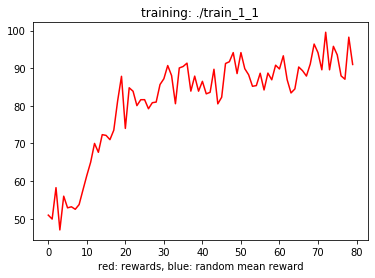

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [2]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import supermario_dqn.preprocess as pr

train_dirs = [d[0] for d in os.walk('.') if 'train' in d[0]]
train_dirs.sort()

for train_dir in train_dirs:
    
    # load 
    try:
        loaded  = pd.read_csv(os.path.join(train_dir, 'episodes.csv'))
    except:
        print(f'not found episodes.csv for {train_dir}')
        continue
    rewards = loaded.sort_values('time')['reward'].to_numpy()
    
    len_rew = len(rewards) // 50
    rewards = rewards[:len_rew*50].reshape(-1, 50).mean(axis=1).reshape(-1)
    
    plt.title(f'training: {train_dir}')
    plt.plot(range(len_rew), rewards, 'r-')
    plt.xlabel('red: rewards, blue: random mean reward')
    plt.show()